## 决策树的生成

一般来说, 一颗决策树包含一个根结点, 若干中间结点, 和若干叶结点. 

- 叶结点 对应决策结果
- 其它结点 对应一个属性测试

每个结点包含的样本集合根据属性测试的结果被划分到子结点中; 根结点包含所有样本. 

决策树学习的目的是生成一个泛化能力强的决策树, 其基本流程遵循"分而治之"策略.

### 生成算法

- 输入: 训练集 $D=\{(x_1, y_1), (x_2, y_2), ..., (x_m, y_m)\}$ 和 属性集 $A=\{a_1, a_2, ..., a_d\}$
- TreeGenerate(D, A)
- 输出: 以 node 为根结点的决策树

```
    1. 生成结点 node
    2. if 训练集D中样本全都属于同一个类别C then
           将node标记为属于C类别的叶结点 return (1)
       endif
    3. if 属性集A为空集 OR D所有样本在所有属性A上的取值都相同 then
           将node标记叶结点, 其类别为D中样本数最多的那个分类C return (2)
       endif
    4. 从属性集A中选择最优划分属性 a*
    5. for 属性a*中的每一个值 a*_v do
           在 node 下生成一个分支结点, 令D_v表示D的子集, 子集中的样本的属性 a* 的取值为 a*_v
           if D_v是空集 then
               将分支结点标记为叶结点, 类别C= D中样本最多的分类 return (3)
           else
               TreeGenerate(D_v, A\{a*}) // A中除去 a* 以外的集合 
           end if

       endfor
```

如上所述, 在决策树的基本算法中, 有三种情况会导致递归返回.
- (1) 当前结点样本都属于同一类别, 无需划分
- (2) 当前属性集为空或所有样本在所有属性上取值相同, 无法划分
- (3) 当前样本集为空, 无法划分

## 划分选择

> 决策树算法的关键在于如何选择最优的划分属性

> 一般而言, 随着划分的过程不断进行, 我们希望分支结点所包含的样本尽可能的属于同一类别

> 也就是结点的纯度越来越高

### Information Entropy 信息熵

信息熵用来度量集合样本纯度, 假设当前集合 $D$ 中, 第 $k$ 类样本的比例为 $p_k(k=1,2,...,|y|)$, 则 $D$ 的信息熵定义为

$$Ent(D) = - \sum_{k=1}^{|y|}p_klog_2p_k$$

$Ent(D)$ 的值越小, 集合 $D$ 纯度越高

### Information Gain 信息增益 [ID3]

假设离散属性 $a$ 有 $V$ 个可能的取值 $\{a^1, a^2,..., a^V\}$, 如果用属性 $a$ 来对样本进行划分, 就会产生 $V$ 个分支结点, 其中第 $v$ 个分支结点包含了 $D$ 中所有在属性 $a$ 上取值为 $a^v$ 的样本, 这个子集记为 $D^v$

那么我们可以算出每个分支结点下的信息熵, 并且**因为每个分支结点所含的样本数量不同**, 需要赋予权重 

$$|D^v|/|D|$$

由此可以计算出, 用属性 $a$ 进行划分所获得的信息增益.

$$Gain(D,a) = Ent(D) - \sum_{v=1}^{V}\frac{|D^v|}{|D|}Ent(D^v)$$

信息增益越大, 说明用这个属性进行划分所带来的纯度提升越大

> ID3 决策树算法就是基于信息增益, 用信息增益最大的属性来进行划分.

> $a_* = \arg\max\limits_{a\in{A}}  Gain(D, a)$

> 一般来说信息增益偏好于选择取值数目多的属性, 因为可取值越多, 分支下的样本就越纯, 进而熵越小, 信息增益越大.


### Gain Ratio 增益率 [C4.5]

为了减少信息增益对多取值属性的偏好所带来的不利影响, 著名的 **C4.5 决策树算法** 使用增益率来选取最优划分属性.

$$Gain\_ratio = \frac{Gain(D,a)}{IV(a)}$$
$$IV(a) = - \sum_{v=1}^V \frac{|D^v|}{|D|}log_2\frac{|D^v|}{|D|}$$

$IV(a)$ 被称为属性 $a$ 的固有值 (intrinsic value), 可取值数目越多 (V越大), $IV(a)$ 的值通常会越大 

> 增益率策略通常对可取值数目较少的属性有所偏好; 所以 **C4.5** 是先选取信息增益大于平均水平的属性, 再在其中选择增益率最高的

### Gini Index 基尼指数 [CART]

CART 决策树 (Classification And Regression Tree) 使用基尼指数来选择划分属性, 数据集 $D$ 的基尼值表示为

$$Gini(D) = \sum_{k=1}^{|y|}\sum_{k'\not = k}^{|y|}p_k^2$$
$$Gini(D) = 1 - \sum_{k=1}^{|y|}p_k^2$$

直观来说 $Gini(D)$ 反应了从数据集中随机抽取两个样本, 其类别不一致的概率. 所以 $Gini(D)$ 越小, 数据集纯度越高. 我们可以把用属性 $a$ 的基尼指数定义为

$$Gini\_index(D,a) = \sum_{v=1}^V \frac{|D^v|}{|D|}Gini(D^v)$$

> 因此, 我们选择划分后基尼指数最大的属性作为最优划分属性

> $a_* = \arg\min\limits_{a \in A} Gini\_index(D,a) $

## 剪枝处理

剪枝是决策树算法中对抗"过拟合"的主要手段, 通过主动去掉一些分支来降低过拟合的风险. 通过判断剪枝前后, 树的泛化性有没有提升, 来决定是否在这个结点进行剪枝, 直接标记为叶结点. 而我们可以采用预留法, 将数据集划分为 训练集 (training set)和 验证集(cv set), 通过模型对验证集的拟合程度, 来判断树的泛化性能.

### Pre-pruning 预剪枝

预剪枝是在树的生成过程中, 每次用属性划分分支结点后, 用验证集来判断划分前后的泛化性能, 如果验证集的精度没有提升, 就不进行划分, 直接标记为叶结点. (如果划分前后, 验证集的精度没有变化, 根据奥卡姆剃刀, 简单的模型更好; 如果考虑保守策略, 也可以不剪枝, 继续划分下去)

因为在树生成过程中, 很多分支有可能就没有展开, 所以预剪枝的时间开销比较小, 但是通常模型比较简单, 所以有过拟合的风险.

### Post-pruning 后剪枝

后剪枝是在树生成后, 逆向的一个个检查分支结点, 同样的, 判断分支结点转为叶结点前后, 验证集的精度是否有提高.

通常后剪枝会保留更多的分支, 后剪枝决策树的过拟合风险较小, 但是训练的时间开销比预剪枝和未剪枝的决策树都要大.

## 连续值处理

当我们处理连续属性的时候, 需要把连续属性转为离散属性, 最简单的策略是使用二分法 [C4.5].

假设有连续属性 $a$, 样本集 $D$ 在属性 $a$ 上有 $n$ 个取值 $\{a^1, a^2, ..., a^n\}$, 我们需要 $n-1$ 个划分点, 每个划分点 t 都会把样本集 $D$ 划分为两部分, $D^-$ 为取值不大于 $t$ 的子集; $D^+$ 为取值大于 $t$ 的子集. 因此, 我们把划分点看做独立的离散属性来处理.

具体的来说, 首先对所有样本在连续属性 $a$ 上的值进行由小到大的排序, 然后每个划分点, 通过二分法, 就是每两个相邻属性值的中间点.

$$T_a = \{ \frac{a_1+a_2}{2}, \frac{a_2+a_3}{2}, ..., \frac{a_{n-1}+a_n}{2} \}$$

接下来,就是把 $T_a$ 看做离散属性集, 来选择最优的划分属性. 值得注意的是, 与离散属性同, 连续属性 $a$ 在当前结点用过后, 在接下去的子结点还可以使用.

## 缺失值处理

决策树算法有能力处理有缺失值的数据, 我们来看一下面对有数据缺失时,需要面对的两个问题.

1. 如何在属性值缺失的情况下, 选择最优的划分属性
2. 给定了划分属性, 当样本在这个属性上的值有缺失时, 应该怎样划分样本

假设 属性 $a$ 有 $V$ 个可取值 $\{a^1, a^2, ..., a^V\}$

- $\tilde{D}$ : 样本集 $D$ 中, 在属性 $a$ 上的值没有缺失的样本子集
- $\tilde{D}_v$ : $\tilde{D}$ 中, 属性 $a=a^v$ 的样本子集 ( $v=1, 2, ..., V$ )
- $\tilde{D}_k$ : $\tilde{D}$ 中, 分类为 $k$ 的样本子集 ( $k=1, 2, ..., |y|$ )
- 假设个每个样本 $x$ 都赋予一个权重 $w_x$, 初始值为 1

我们定义一下三个值, 直观的理解: 对于属性 $a$

- $\rho$ 表示无缺失值样本的比例; 
- $\tilde{p}_k$ 表示无缺失值样本中, 第 $k$ 类样本占的比例; 
- $\tilde{r}_v$ 表示无缺失值样本中, $a$ 上取值为 $a^v$ 的样本的比例

$$\rho = \frac{\sum_{x\in{\tilde{D}}}w_x}{\sum_{x\in{D}}w_x}$$

$$\tilde{p}_k = \frac{\sum_{x\in{\tilde{D}_k}}w_x}{\sum_{x\in{\tilde{D}}}w_x}$$

$$\tilde{r}_v = \frac{\sum_{x\in{\tilde{D}_v}}w_x}{\sum_{x\in{\tilde{D}}}w_x}$$

对于问题 1 **如何在属性值缺失的情况下, 选择最优的划分属性**, 我们只能根据 $\tilde{D}$ 来选择最优划分属性, 将信息增益的公式推广为

$$Gain(D,a) = \rho \times Grain(\tilde{D},a)$$

$$Gain(D,a) = \rho \times \lgroup Ent(\tilde{D},a) - \sum_{v=1}^{V}\tilde{r}_v Ent(\tilde{}_v) \rgroup$$

$$Ent(D̃) = - \sum_{k=1}^{|y|} \tilde{p}_k log_2 \tilde{p}_k$$

对于问题 2 **给定了划分属性, 当样本在这个属性上的值有缺失时, 应该怎样划分样本**, 分为两种情况, 如果样本没有属性值缺失, 那么就划分到对应属性值的子结点里, 保持样本权重 $w_x$ 不变; 如果样本在属性上的值有缺失, 那么把这个样本划分到所有子结点里, 并且更新样本权重值为 $\tilde{r}_v \cdot w_x$ (直观理解, 让样本以不同的概率划分到不同的子结点里)

## 多属性决策树

如果把样本的一个属性看做坐标空间中的一个坐标轴, 那么一个有 d 个属性的样本, 就可以被描述成在 d 维空间中的一个点. 而普通决策树, 每一个分支结点的划分, 都是根据单一属性划分, 也就是每一个分类条件边界都是 **轴平行** 的. 进而整颗树的分类边界也是轴平行的, 由若干个与坐标轴平行的分段组成. 这种情况, 在真实分类边界比较复杂时, 必须使用很多段才能获得一个比较好的近似, 从而导致大量的属性测试, 决策树会变得非常复杂, 预测的时间开销也会很大.

<img src="images/decision_tree_bound.png" width="300"/>

多属性决策树, 再分支的划分上, 不再只考虑单个属性, 而是多个属性的组合. 例如下图的斜线的分类边界, 就是两个属性的线性组合; 这样的话, 决策树的模型会得到简化. 多属性决策树, 不是为每个分支结点找到最有的划分属性, 而是寻找一个最合适的线性分类器.

<img src="images/multivariate_decision_tree_bound.png" width="300"/>

## 随机森林 集成学习

Bagging [Breiman, 1996a] 是并行式集成学习方法最著名的代表. 而随机森林 Random Forest(RF) [Breiman, 2001a] 是 Bagging 的一个扩展变体. RF 是在意决策树为基学习器构建 Bagging 集成的基础上, 进一步在决策树的训练过程中, 引入了随机属性选择. 具体来说, 就是在分支结点选择最优划分属性的时候, 假设当前属性集合有 d 个属性, 先从当前属性集合中随机选择 k 个属性, 再从这 k 个属性的子集中选出最优的划分属性. 

- 若令 k = d, 则基决策树的构建方式与传统决策树相同
- 若令 k = 1, 则是随机选择一个属性进行划分
- 一般来说, 推荐 $k=log_2d$ [Breiman, 2001a]

随机森林中基学习器的多样性与 Bagging 中的相比, 不仅来自于**样本扰动**, 而且还来自于**属性扰动**. 这就使得最终集成的泛化性能,可能通过个体基学习器之间差异度的增加, 而进一步提高.

随机森林的收敛性和 Bagging 相似. 通常随机森林的起始性能相对较差, 尤其是基学习器数量较少的时候, 问题属性扰动的加入, 往往使单个学习器的性能降低; 然而随着个体学习器数目的增加, **随机森林通常会收敛到更低的泛化误差**. 

而且**随机森林的训练效率也是优于 Bagging** 的, 因为 Bagging 在构建基学习器的时候使用的是确定的决策树, 要考察所有的属性, 而随机森林中只需要考察一个属性子集.

## Coding by Sklearn

model http://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart
    
sklearn.tree.DecisionTreeClassifier http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
        
Understanding the decision tree structure http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### DTs

In [11]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [13]:
clf.predict([[2,2]])

array([1])

In [68]:
from sklearn.datasets import load_iris
iris = load_iris()
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(iris.data, iris.target)

the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf

In [44]:
clf2.predict_proba(iris.data[1:10,:])

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

使用 `sklearn.model_selection.cross_val_score` 衡量模型质量

In [109]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf2, iris.data, iris.target, cv=15).mean()

0.95925925925925926

### RF

In [117]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=10000)

In [98]:
clf3.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

通过 `clf.feature_importances_` 来查看属性的重要程度

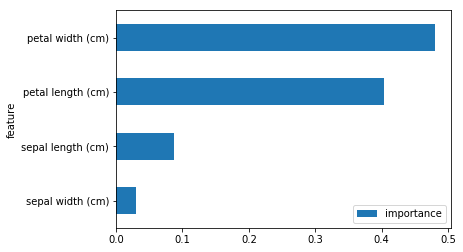

In [113]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

features = pd.DataFrame()
features['feature'] = iris.feature_names
features['importance'] = clf3.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind="barh")


In [118]:
cross_val_score(clf3, iris.data, iris.target, cv=15).mean()

0.95925925925925926